# Linear Regression
Based on: 
- https://habrahabr.ru/company/ods/blog/322076/ Базовые принципы машинного обучения на примере линейной регрессии (ru)

## Predict Harmonic Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# list available fonts: [f.name for f in matplotlib.font_manager.fontManager.ttflist]
matplotlib.rc('font', family='DejaVu Sans') 

In [2]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # get few points on [0, 2*pi] interval
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # for each get its value sin(x) + 1
    # it will be ground truth
    data['values'] = np.sin(data['support']) + 1
    # from support get some train data
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sin(x) + 1 with noise
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

In [3]:
dataset = generate_wave_set(1000, 250)

### Draw dataset

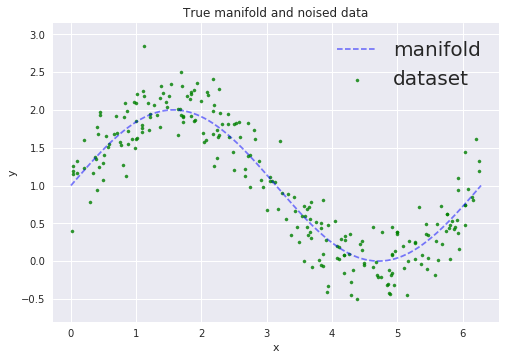

In [4]:
margin = 0.3
plt.plot(dataset['support'], dataset['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(dataset['x_train'], dataset['y_train'], 40, 'g', '.', alpha=0.8, label='dataset')
plt.xlim(dataset['x_train'].min() - margin, dataset['x_train'].max() + margin)
plt.ylim(dataset['y_train'].min() - margin, dataset['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Train Linear Regression

In [5]:
# add column with 1-s
X = np.array([np.ones(dataset['x_train'].shape[0]), dataset['x_train']]).T
# solve linear function
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), dataset['y_train'])
# get prediction
y_hat = np.dot(w, X.T)

### Draw Prediction

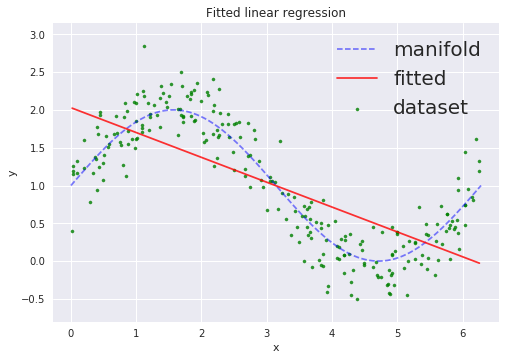

In [6]:
margin = 0.3
plt.plot(dataset['support'], dataset['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(dataset['x_train'], dataset['y_train'], 40, 'g', '.', alpha=0.8, label='dataset')
plt.plot(dataset['x_train'], y_hat, 'r', alpha=0.8, label='fitted')
plt.xlim(dataset['x_train'].min() - margin, dataset['x_train'].max() + margin)
plt.ylim(dataset['y_train'].min() - margin, dataset['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Error Estimation

In [14]:
sum((y_hat-dataset['y_train'])*(y_hat-dataset['y_train']))/2*

78.553546920387589